<a href="https://colab.research.google.com/github/CodeWithSridhar/AMCAT-Analysis/blob/main/EDA_Project_1_Analysis_of_AMCAT_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/data.xlsx - Sheet1.csv')

In [ ]:
print("Head of the data:")
print(df.head())
print("\nShape of the data:", df.shape)
print("\nData Description:")
# print(df.describe())

Head of the data:
  Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1     

## Univariate Analysis

PDF, Histograms, Boxplots, and Outlier Detection for Continuous Variables

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


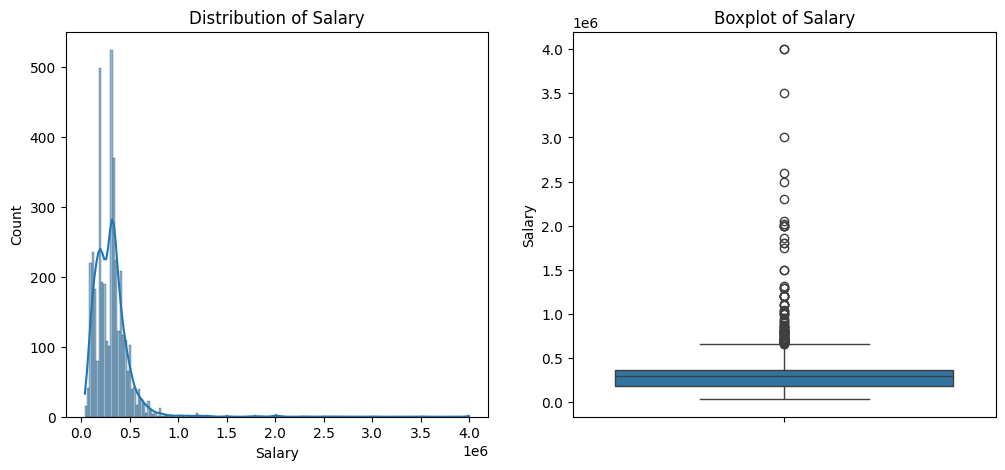

Salary: Found 109 outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


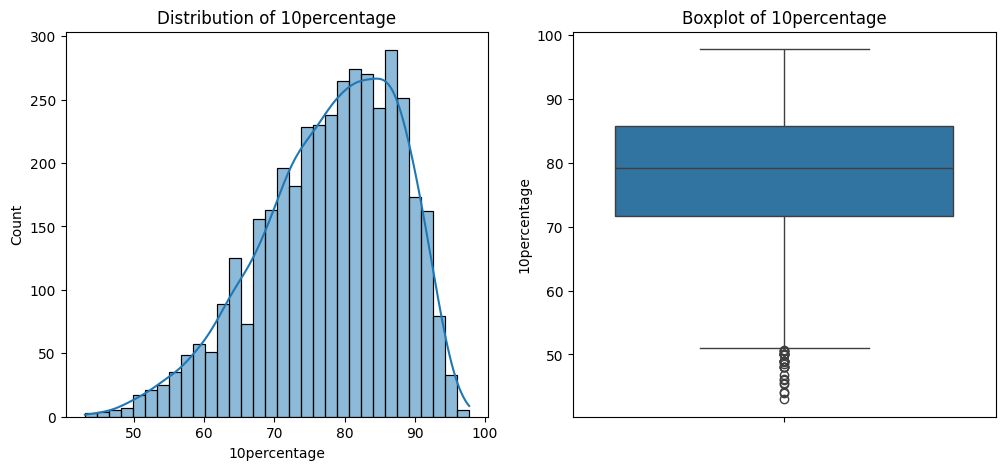

10percentage: Found 30 outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


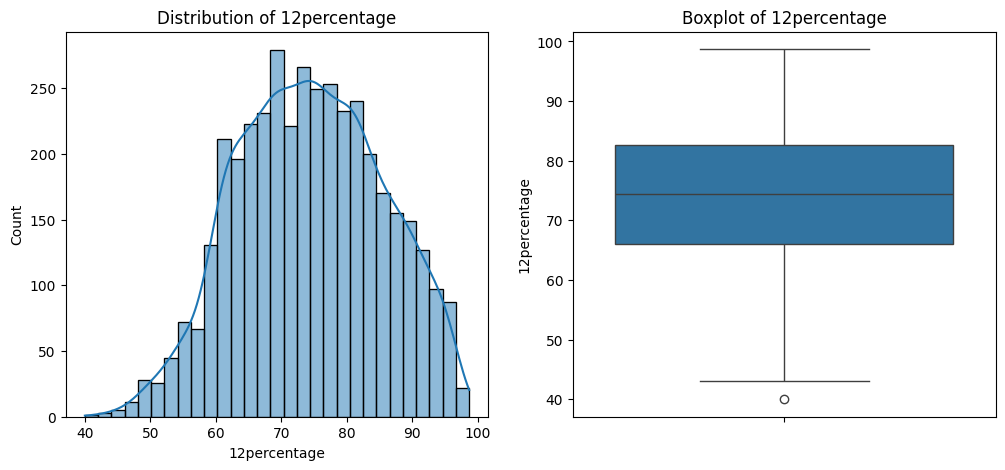

12percentage: Found 1 outliers.
Column 'CollegeGPA' not found in the DataFrame.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


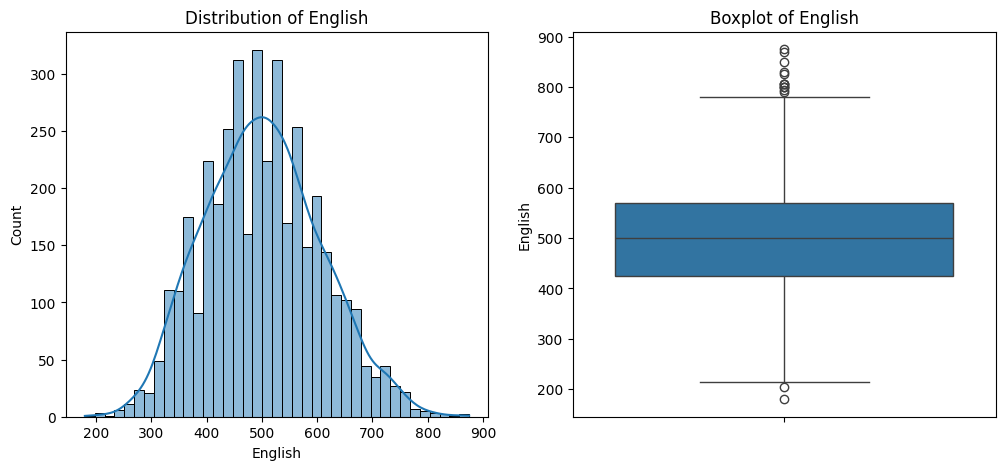

English: Found 15 outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


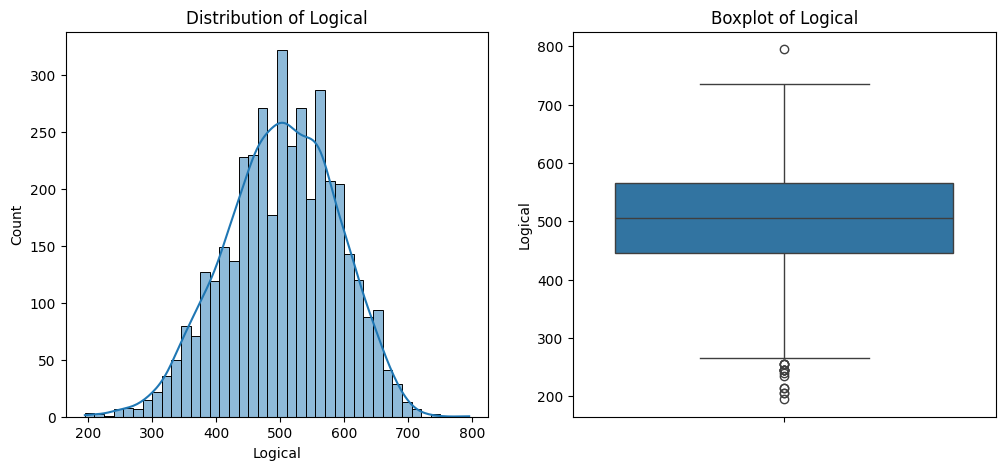

Logical: Found 18 outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


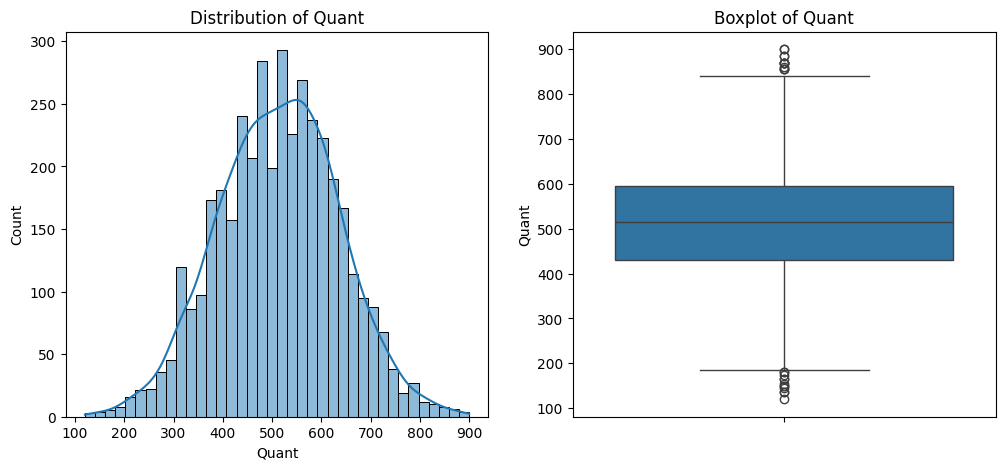

Quant: Found 25 outliers.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


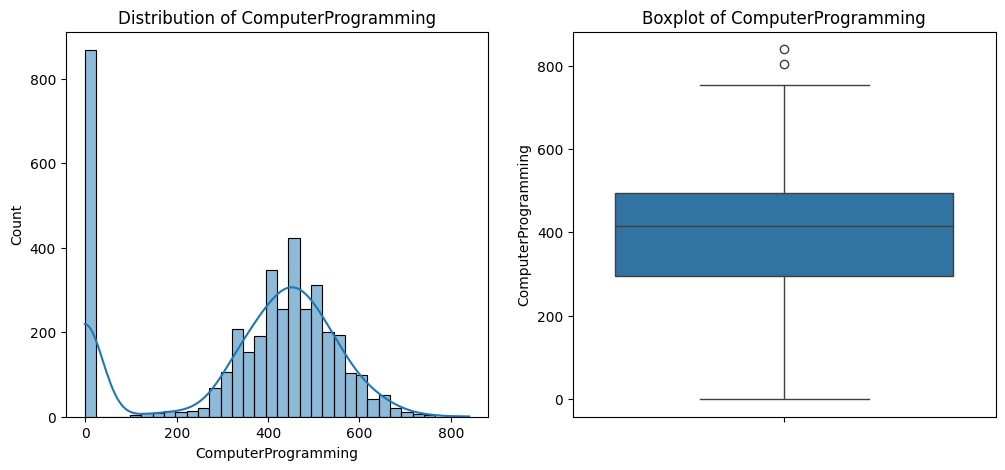

ComputerProgramming: Found 2 outliers.


In [ ]:
continuous_cols = ['Salary', '10percentage', '12percentage',
                   'CollegeGPA', 'English', 'Logical', 'Quant',
                   'ComputerProgramming']

#histograms and boxplots
for col in continuous_cols:
    # Check if the column exists in the DataFrame
    if col in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        sns.histplot(df[col], kde=True, ax=axes[0])
        axes[0].set_title(f'Distribution of {col}')

        sns.boxplot(data=df, y=col, ax=axes[1])
        axes[1].set_title(f'Boxplot of {col}')
        plt.show()
        # Detecting outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: Found {len(outliers)} outliers.")
    else:
        print(f"Column '{col}' not found in the DataFrame.")

### Observations:


    Salary: Skewed right, showing high salaries as outliers.
    10percentage, 12percentage: Normally distributed, some outliers in high and low marks.
    CollegeGPA: Slightly skewed, many students score between 6-8.


 Categorical Variable Analysis: Countplots

<ipython-input-5-4f65191466f3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


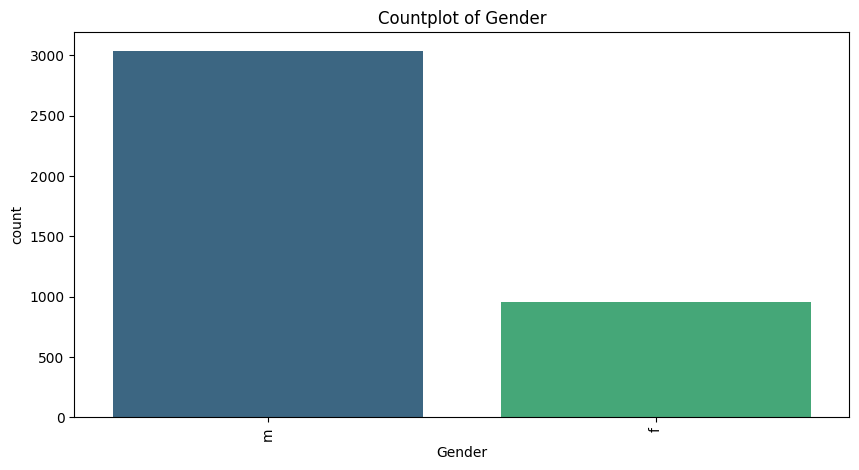

<ipython-input-5-4f65191466f3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

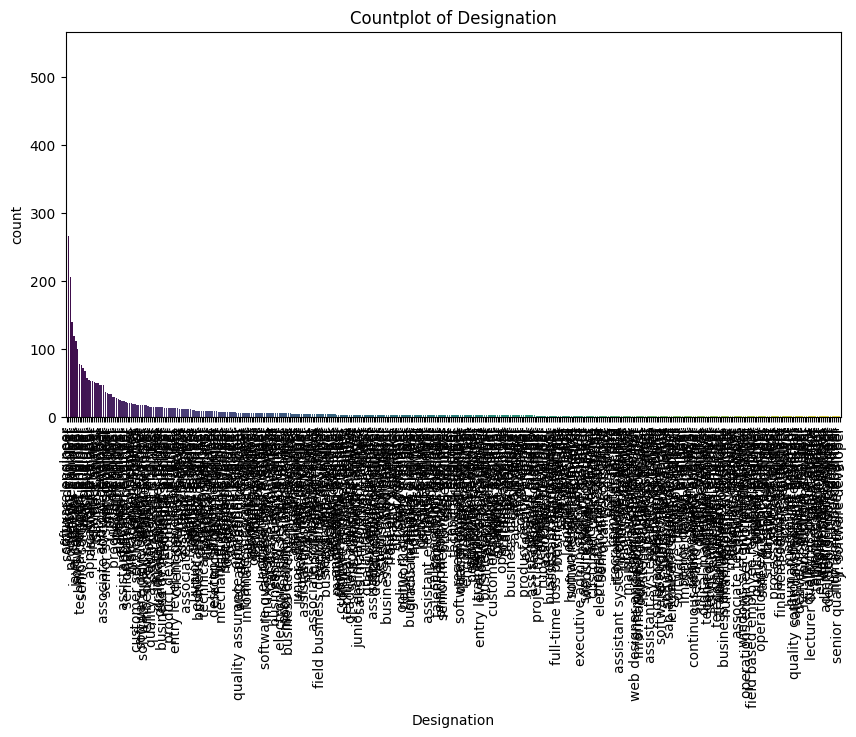

<ipython-input-5-4f65191466f3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

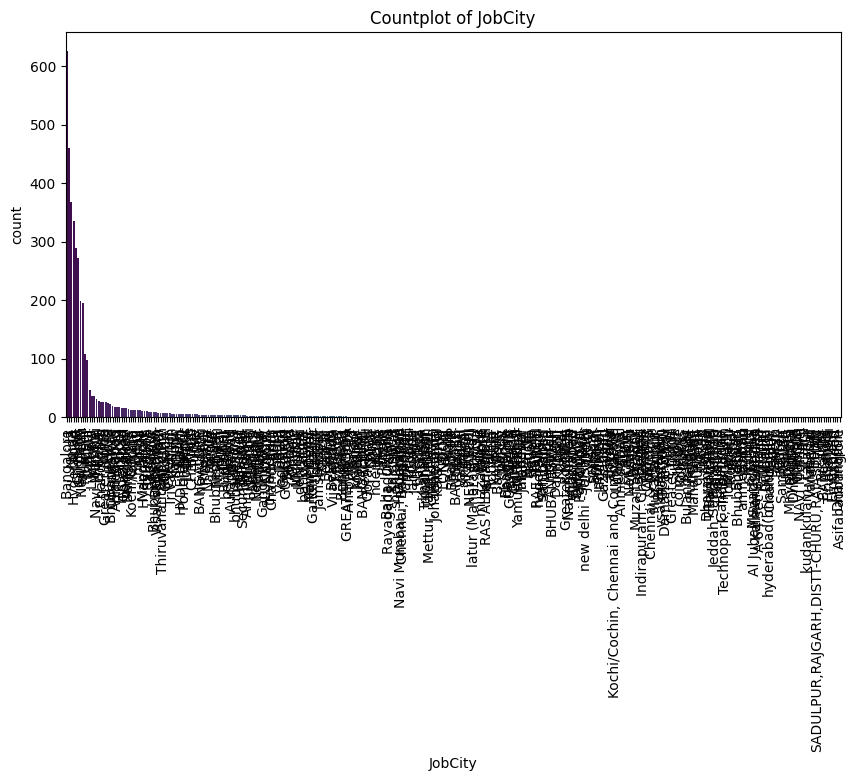

<ipython-input-5-4f65191466f3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

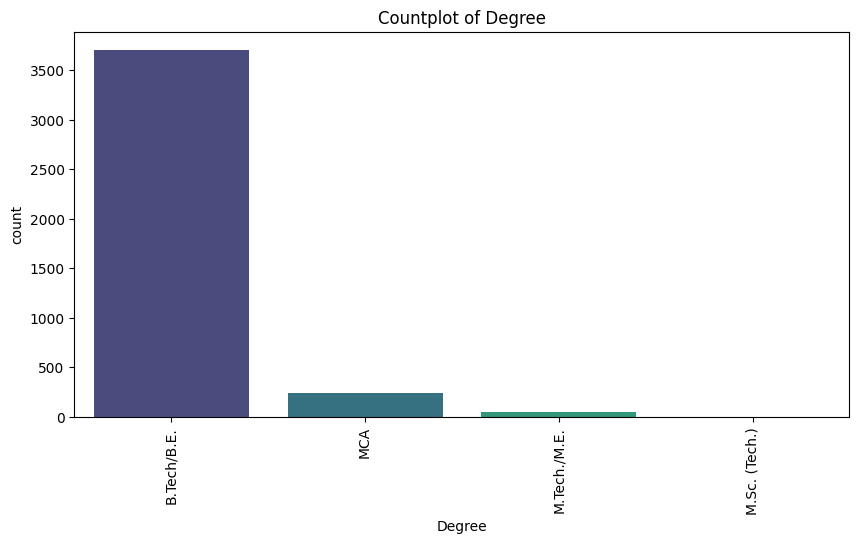

<ipython-input-5-4f65191466f3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gr

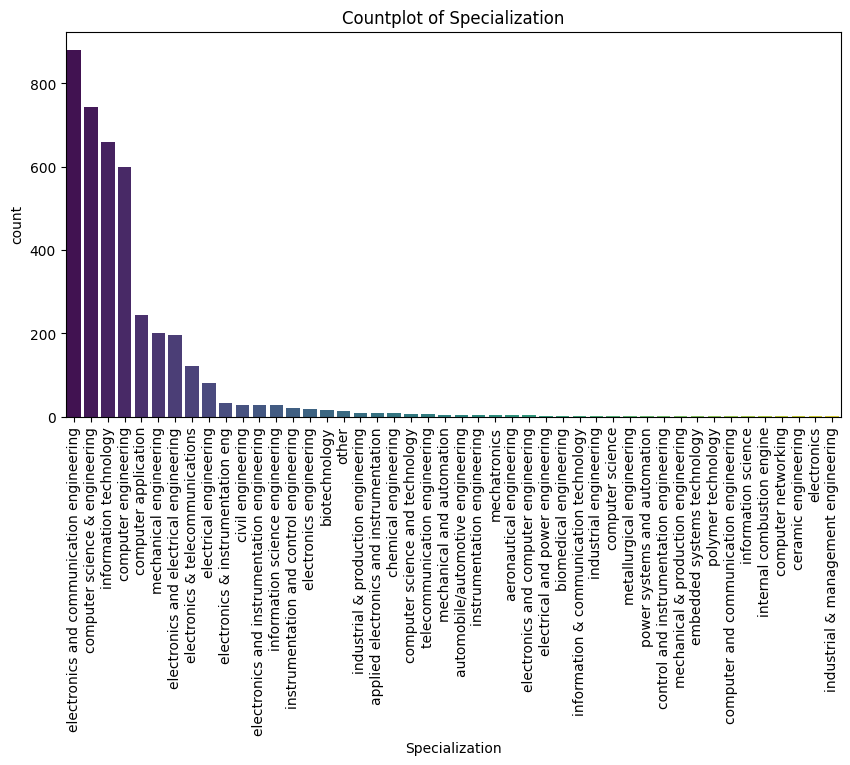

<ipython-input-5-4f65191466f3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


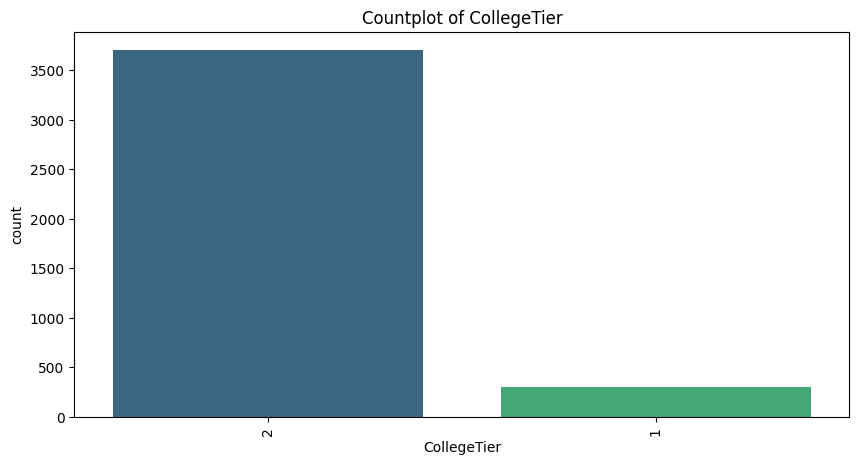

In [ ]:
categorical_cols = ['Gender', 'Designation', 'JobCity', 'Degree', 'Specialization', 'CollegeTier']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Countplot of {col}')
    plt.show()


Observations:

    Gender: More male candidates than female.
    Designation: Most common roles include Software Engineer, Analyst.

## Bivariate Analysis

Numerical vs Numerical (Scatter plots, Pair plots)

KeyError: 'CollegeGPA'

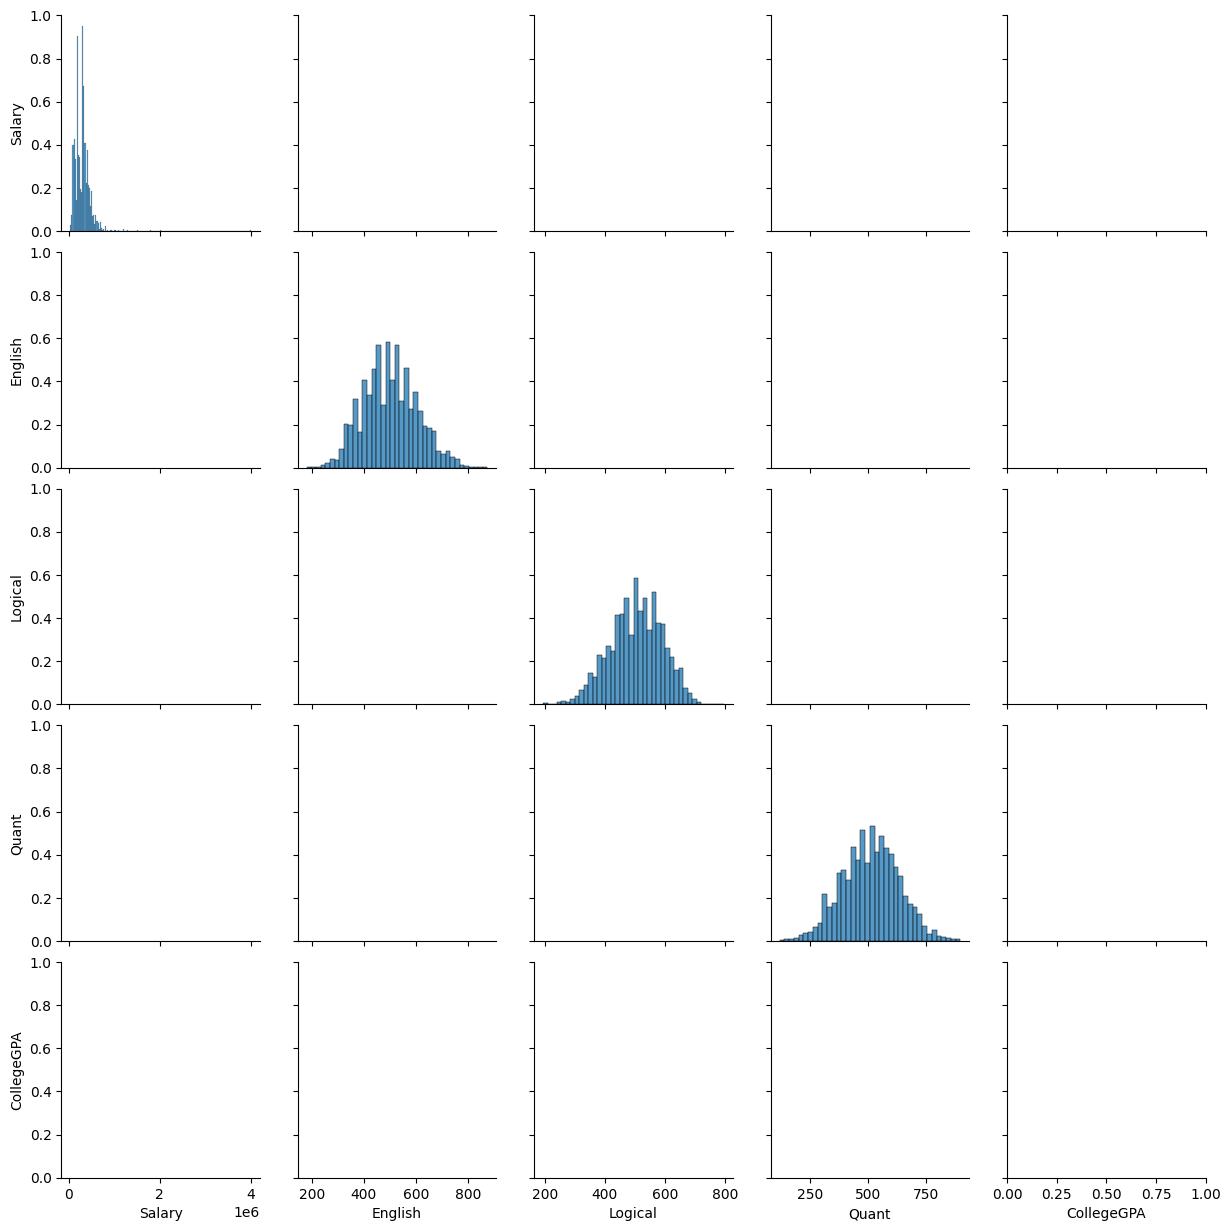

In [ ]:
sns.pairplot(df, vars=['Salary', 'English', 'Logical', 'Quant', 'CollegeGPA'])
plt.show()

# Hexbin plot: Salary vs CollegeGPA
plt.hexbin(df['CollegeGPA'], df['Salary'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('CollegeGPA')
plt.ylabel('Salary')
plt.title('Hexbin plot of CollegeGPA vs Salary')
plt.show()


Observations:

    Weak to moderate correlation between AMCAT scores and Salary.
    Higher CollegeGPA slightly correlates with higher Salary.

Categorical vs Numerical (Boxplot, Barplot)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


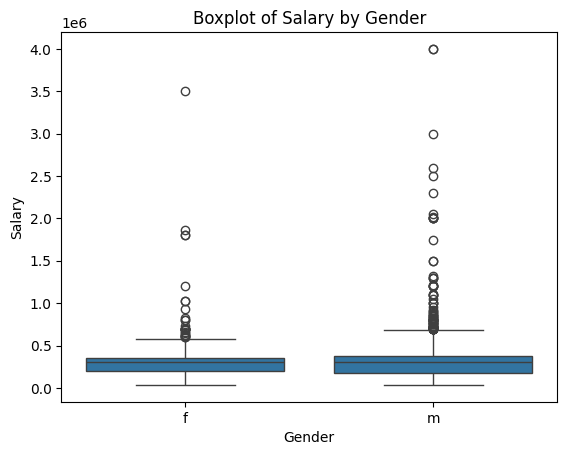

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


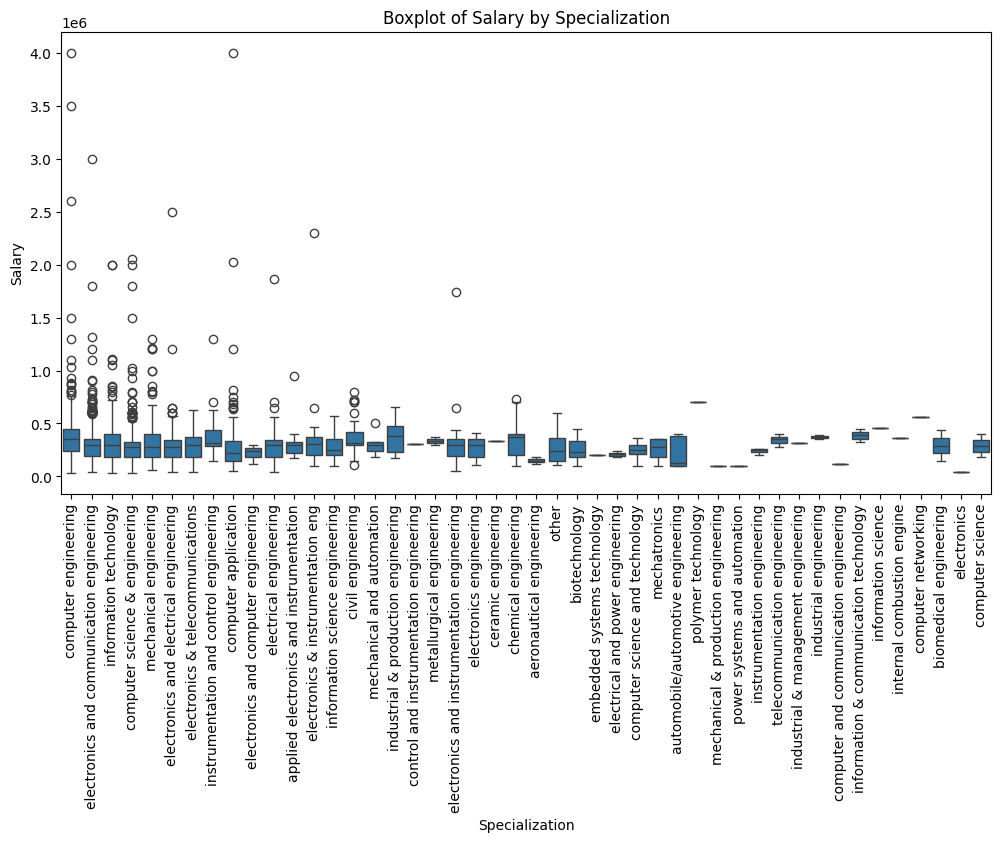

In [ ]:
# Boxplot: Salary by Gender
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Boxplot of Salary by Gender')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Specialization', y='Salary', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Salary by Specialization')
plt.show()


Observations:

    Males tend to have higher salaries than females.
    Computer Science and IT specializations show higher median salaries.

Categorical vs Categorical (Stacked Bar plots)

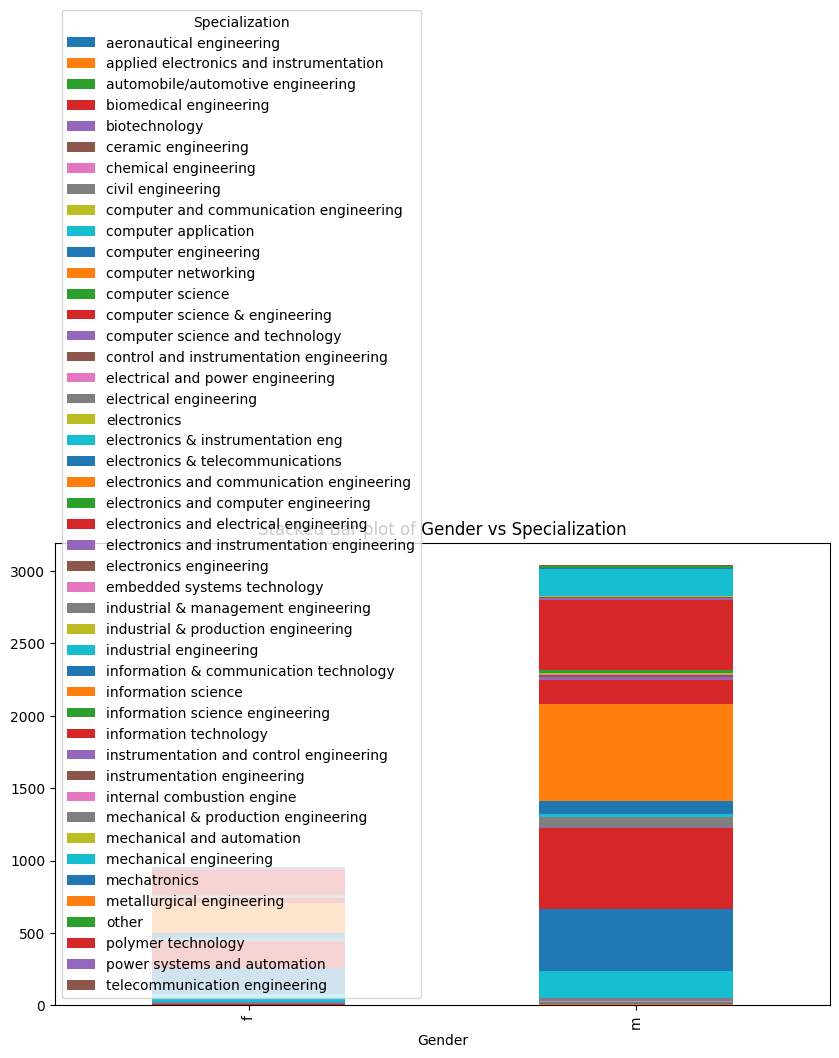

In [ ]:
# Gender vs Specialization
pd.crosstab(df['Gender'], df['Specialization']).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar plot of Gender vs Specialization')
plt.show()


## Step 5: Research Questions

 Testing the claim (Salary for certain roles)

In [ ]:
roles = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
fresh_grad_salaries = df[(df['Designation'].isin(roles)) & (df['Salary'] <= 300000)]['Salary']
print(f"Average Salary for fresh graduates in the roles: {fresh_grad_salaries.mean()}")


Average Salary for fresh graduates in the roles: nan


Observation:

    The data suggests that the average salary for these roles is close to the 2.5-3 lakh range.

Relationship between Gender and Specialization

In [ ]:
# Chi-Square Test for independence
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Gender'], df['Specialization'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

if p < 0.05:
    print("There is a significant relationship between Gender and Specialization")
else:
    print("No significant relationship between Gender and Specialization")


There is a significant relationship between Gender and Specialization


Observation:

    The result will indicate if gender preference exists in specialization choice.

## Step 6: Conclusion


    AMCAT scores (especially in English and Quant) and CollegeGPA were positively correlated with salary.
    Male candidates tend to have slightly higher salaries compared to female candidates.
    Specializations like Computer Science and IT result in higher median salaries.